# Finite Difference Method for the Schrödinger Equation


### 1. Setup and Notation

We work in *atomic units* ($\hbar = 1, m = 1$) so that the Schrödinger equations read:

$$
\text{(TISE)} \quad -\tfrac{1}{2}\,\psi''(x) + V(x)\,\psi(x) \;=\; E\,\psi(x)
$$

$$
\text{(TDSE)} \quad i\,\frac{\partial \psi}{\partial t}(x,t) \;=\; \left[-\tfrac{1}{2}\,\frac{\partial^2}{\partial x^2} + V(x)\right]\psi(x,t)
$$

We discretize the spatial domain $[x_{\min},x_{\max}]$ into $N$ intervals: $
x_j = x_{\min} + jh, 
\qquad 
h = \frac{x_{\max} - x_{\min}}{N}, 
\qquad j = 0,1,\dots,N
$

We impose Dirichlet boundary conditions for a particle in a box: $
\psi(x_{\min}) = 0, \qquad \psi(x_{\max}) = 0
$


### 2. Finite Difference Approximation

The second derivative is approximated using the central difference formula:

$$
\psi''(x_j) \;\approx\; \frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{h^2}
$$

This replacement converts the differential equation into a system of algebraic equations on the discrete grid.

### 3. Time-Independent Schrödinger Equation (Matrix Form)

At interior points $$j = 1,2,\dots,N-1$$, the discretized equation is:

$$
-\frac{1}{2}\,\frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{h^2}
\;+\; V_j\,\psi_j 
\;=\; E\,\psi_j
$$

Collecting the unknowns  

$$
\boldsymbol{\psi} = (\psi_1, \psi_2, \dots, \psi_{N-1})^\top ,
$$

we obtain the matrix eigenvalue problem:

$$
H\,\boldsymbol{\psi} = E\,\boldsymbol{\psi}
$$

Here the Hamiltonian matrix is tridiagonal:

$$
H = -\frac{1}{2h^2}
\begin{bmatrix}
-2 & 1  &        &        & 0 \\
1  & -2 & 1      &        &   \\
   & \ddots & \ddots & \ddots &   \\
   &        & 1  & -2 & 1 \\
0  &        &    & 1  & -2
\end{bmatrix}
+ \operatorname{diag}(V_1,\dots,V_{N-1})
$$

This symmetric matrix eigenproblem can be solved numerically to obtain approximate energy eigenvalues $E$ and wavefunctions $\psi$.

---

#### I have now used this to calculate the eigenvalues and wavefunctions of Harmonic Oscillator and Infinite Square Well Potential  

---


What is the quantum number of the bound state you want?  0


The eigenvalue of n = 0 state is : 0.50


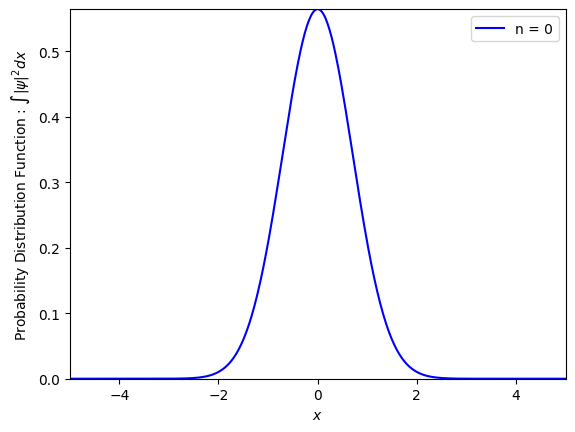

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Potential = lambda x : (1.0/2.0)*x*x

def wavefunctions(Lx,N):
    #Lx = 5
    #N = 101 # Number of intervals
    h = 2* Lx/(N-1) 
    x = np.linspace(-Lx,Lx,N)
    dim = len(x)
    H = np.eye(dim)*(-2)
    H[np.arange(0,dim-1),np.arange(1,dim)]= 1
    H[np.arange(1,dim),np.arange(0,dim-1)] = 1 
    H *= (-1.0/(2*h*h))
    V =  np.diag(Potential(x))
    H = H +V
    eigval, eigvec = np.linalg.eig(H)
    sorted_indices = np.argsort(eigval)
    eigval = eigval[sorted_indices]
    eigvec = eigvec[:,sorted_indices]
    return eigval,eigvec

def eigenvalue(i,Lx,N):
    egval, evec = wavefunctions(Lx,N)
    return egval[i]

def pdfunc(i,Lx,N):
    _, evec = wavefunctions(Lx,N)
    x = np.linspace(-Lx,Lx,N)
    norm = evec[:,i]**2
    norm *= (x[1]-x[0])
    norm = np.sum(norm)
    probability = (evec[:,i]*evec[:,i])/norm
    plt.plot(x,probability,"b-",label="n = {}".format(i))
    plt.xlabel("$x$")
    plt.ylabel(r"Probability Distribution Function : $\int |\psi|^2 dx$")
    plt.xlim(-5,5)
    plt.ylim(np.min(probability),np.max(probability))
    plt.legend()
    plt.show()
    pass

def wfinfo(i,Lx,N):
    print("The eigenvalue of n = {} state is : {egval:.2f}".format(i,egval = eigenvalue(i,Lx,N)))
    pdfunc(i,Lx,N)

Potential = lambda x : (1.0/2.0)*x*x #Harmonic Oscillator Potential
#Potential = lambda x : (x-1.0)**50 #Infinite square well potential
n = input("What is the quantum number of the bound state you want? ")
n = int(n)
Lx = 5 # Half of the lenth of the observation range
N = 501 # Number of intervals

wfinfo(n,Lx,N)